## Изучение полученных данных

### Импорт библиотек и чтение файла

Импортируем библиотеки с которыми нам предстоит работать.

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools

Отключим предупреждения.

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

Зададим переменную path для работы с файлом на локальной машине.

In [3]:
path = '/Users/segagoose/Documents/YandexPracticum/ML/project'

Прочитаем полученный файл.

In [4]:
try:
    data = pd.read_csv(path + '/gym_churn.csv')
except:
    data = pd.read_csv('/datasets/gym_churn.csv')

Выведем первые 5 строк датасета.

In [5]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Знакомство с полученными данными

Изучим информацию о датасете.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Пропуски в данных отсутствуют.

Проверим данные на наличие дубликатов.

In [7]:
data[data.duplicated() == True]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn


Дубликаты также отсутствуют.

Переименуем названия столбцов согласно принятым стандартам.

In [8]:
data.columns = data.columns.str.lower()

Провеведем преобразование типов данных на более подходящие.

In [9]:
data['month_to_end_contract'] = data['month_to_end_contract'].astype('Int64')

In [10]:
for column in [
    'gender', 
    'near_location', 
    'partner', 
    'promo_friends', 
    'phone', 
    'contract_period', 
    'group_visits', 
    'age', 
    'month_to_end_contract', 
    'lifetime', 
    'churn'
]:
    data[column] = data[column].astype('Int8')

In [11]:
data['churn'] = data['churn'].astype('bool')

Посмотрим на результат.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null Int8
near_location                        4000 non-null Int8
partner                              4000 non-null Int8
promo_friends                        4000 non-null Int8
phone                                4000 non-null Int8
contract_period                      4000 non-null Int8
group_visits                         4000 non-null Int8
age                                  4000 non-null Int8
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null Int8
lifetime                             4000 non-null Int8
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null bool
dtypes: Int8(10), bool(1), float64(3)
memory usage: 175.9 KB


Теперь проведем преобразование категориального признака `contract_period`.

In [13]:
data = data.join(pd.get_dummies(data.contract_period, prefix='contract_period'))

После создания новых столбцов с признаками длительности договора, колонка `contract_period` нам больше не нужна, удалим ее.

In [14]:
data = data.drop('contract_period', axis=1)

Проверим результат.

In [15]:
data.head()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,contract_period_1,contract_period_6,contract_period_12
0,1,1,1,1,0,1,29,14.227470,5,3,0.020398,0.000000,False,0,1,0
1,0,1,0,0,1,1,31,113.202938,12,7,1.922936,1.910244,False,0,0,1
2,0,1,1,0,1,0,28,129.448479,1,2,1.859098,1.736502,False,1,0,0
3,0,1,1,1,1,1,33,62.669863,12,2,3.205633,3.357215,False,0,0,1
4,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,False,1,0,0


Можем приступать к этапу EDA.

### Исследовательский анализ данных

Ранее мы уже выяснили, что в полученных данных отсутствуют пропуски. Изучим датасет с помощью метода describe() и посмотрим, что еще нам он может сказать.

In [16]:
data.describe()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,contract_period_1,contract_period_6,contract_period_12
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.551750,0.208250,0.240000
std,0.499957,0.361711,0.499887,0.461932,0.295313,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.497377,0.406107,0.427137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000,1.000000,1.000000


Итак, что мы можем сказать:  
- разделение клиентов по гендерному признаку происходит практически равнозначно; 
- большинство клиентов проживают или работают рядом с фитнес-центром;
- почти 50% клиентов дают компании партнеры;
- примерно треть клиентов приобрели свой первый абонемент в рамках акции «приведи друга»;
- датасет хранит контактные номера подавляющего большинства клиентов;
- на групповые занятия ходит порядка 41% пользователей;
- среднее и медианное значение возрастра клиентов совпадают и равняются 29 годам, минимальный возраст зарегистрированного клиента - 18 лет, а максимальный - 41 год;
- максимальная продожительность пользования клиентом услугами фитнес-центра зафиксирована сроком 31 месяц, тогда как средний показатель не достигает и 4 месяцев;
- почти 55% посетителей приобретают абонемент на 1 месяц, около 21% посетителей предпочитают абонементы сроком на пол года и 24% - на год;
- в среднем посетители посещают зал не более 2 раз в неделю, это подтверждает и медианное значение;
- среднее значение признака avg_class_frequency_current_month, говорит о том, что средние значение посещений зала в неделю идет на спад, это может связано с сезоностью, а также ухудшением предоставляемых услуг;
- среднее значение суммарной выручки ниже медианного значения, а стандартное отклонение достаточно высокое, это говорит о том, что большая часть посетителей тратят мало средств на доп. услуги центра.

Сгруппируем данные по признаку оттока клиентов `churn` и изучим средние показатели тех кто ушел и тех кто остался.

In [17]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,contract_period_1,contract_period_6,contract_period_12
churn,,,,,,,,,,,,,,,
False,0.510037,0.873086,0.534195,0.353522,0.903709,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.433141,0.248044,0.318816
True,0.510839,0.768143,0.355325,0.183789,0.902922,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,0.880302,0.098021,0.021678


Выводы:
- гендерные признаки никак не влияют на статистику оттока клиентов;
- среди ушедших посетителей меньшее количество проживающих или работающих рядом людей, чем среди активных;
- фитнес-центр чаще теряет клиентов не связанных с компаниями-партнерами и не пришедших по промо-акции "приведи друга";
- клиенты не пользующиеся групповыми занятиями, чаще перестают пользоваться услугами клуба;
- средний возрат группы ушедших клиентов ниже, чем у действующих;
- посетители не планирующие долго задерживаться в клубе, чаще покупают абонементы сроком на 1 месяц;
- показатель суммарной выручки у группы оттока более низкий.

Построим гисторграммы распределения значений признаков для бывших клиентов.

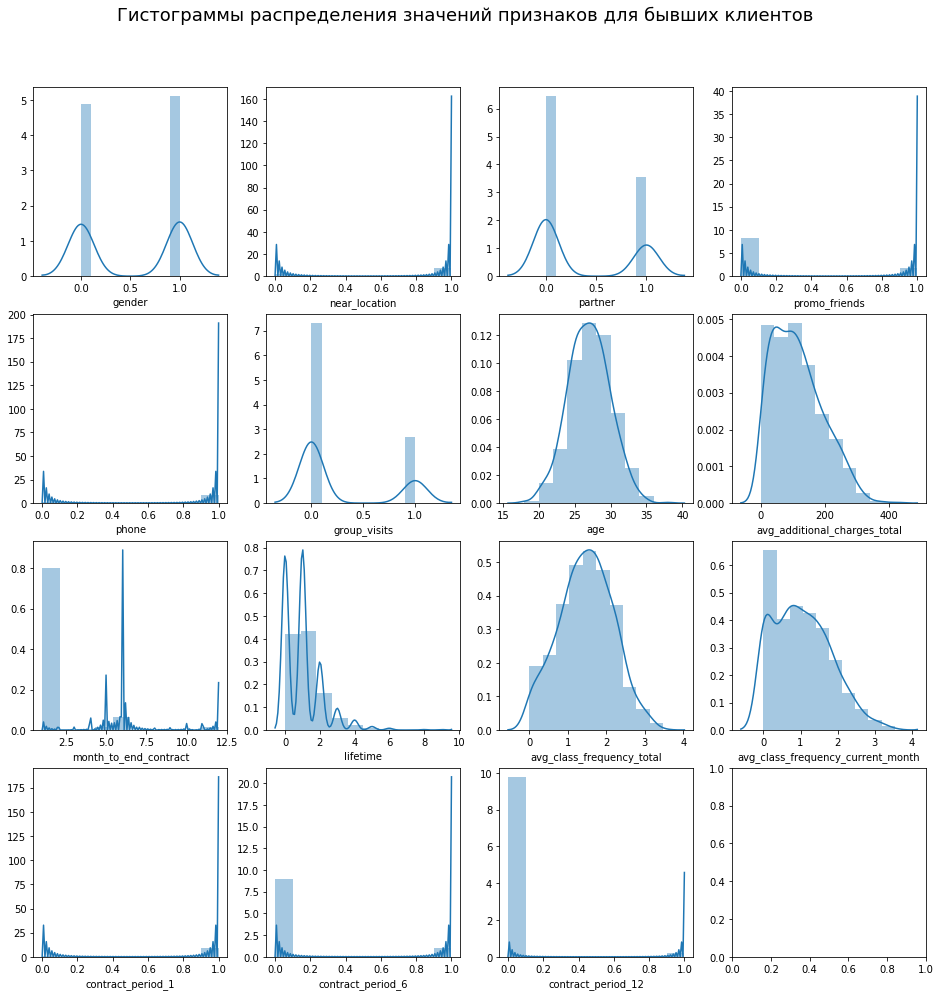

In [18]:
fig, ax = plt.subplots(4, 4, figsize=(16,16))
ax = ax.ravel()
plt.suptitle('Гистограммы распределения значений признаков для бывших клиентов', fontsize=18, y=0.95)

for n, feature in enumerate(data.drop('churn', axis=1).columns):
    sns.distplot(data[data['churn'] == 1][feature], bins=10, ax=ax[n])
plt.show()

Значения признаков age и avg_class_frequency_total распределены нормально, значения lifetime, avg_class_frequency_current_month и avg_additional_charges_total скошены вправо. Значения столбцов contract_period_1, contract_period_6 и contract_period_12 не имеют большого перевеса в одну сторону, клиенты приобретают хорошо все виды абонементов.

Далее посмотрим гисторграммы распределения значений признаков для бывших клиентов.

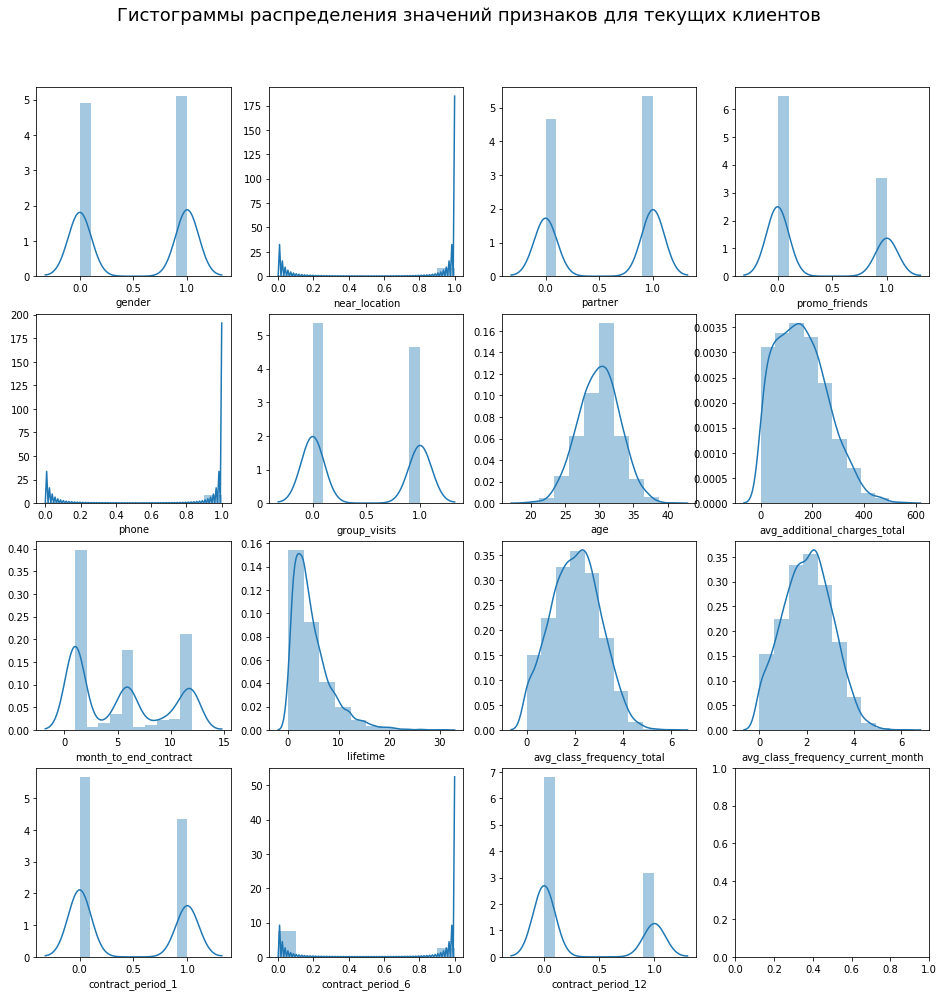

In [19]:
fig, ax = plt.subplots(4, 4, figsize=(16,16))
ax = ax.ravel()
plt.suptitle('Гистограммы распределения значений признаков для текущих клиентов', fontsize=18, y=0.95)

for n, feature in enumerate(data.drop('churn', axis=1).columns):
    sns.distplot(data[data['churn'] == 0][feature], bins=10, ax=ax[n])
plt.show()

Данные распределены нормально у признаков age, avg_class_frequency_month и avg_class_frequency_total, а lifetime и avg_additional_charges_total имеют скос вправо. Среди бывших клиентов преобладает признак contract_period_1.

Так как стандартное отклоенение признаков не велико и отсутствует большой разброс значений, мы не будет заниматься отсеиванием выбросов.

Для дальнейшего изучения данных построим матрицу корреляций признаков и запишем ее в переменную mc.

In [20]:
mc = data.corr()

Визуализируем ее.

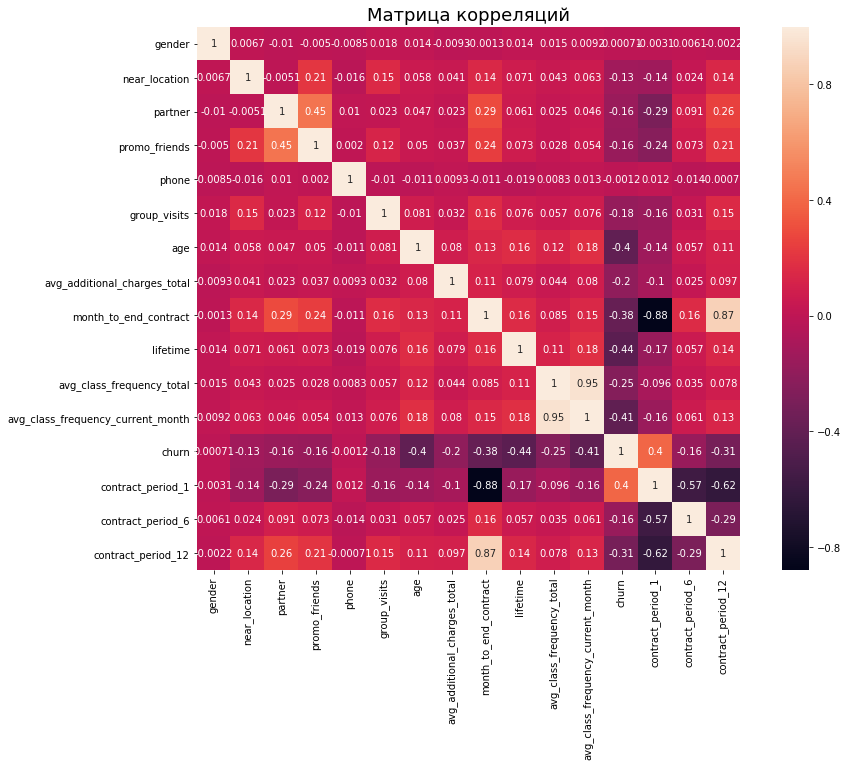

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=mc, annot=True, square=True)
plt.title('Матрица корреляций', fontsize=18)
plt.show()

Большинство признаков не имеют между собой сильной связи. Наиболее коррелирующие признаки, это:
- avg_class_frequency_total и avg_class_frequency_current_month;
- contract_period_12 и month_to_end_contract;
- contract_period_1 и month_to_end_contract.  

Целевая переменная `churn` сильнее всего коррелируют с признаками: age, month_to_end_contract, lifetime, avg_class_frequency_current_month, contract_period_1 и contract_period_12.

Удалим сильно коррелирующие столбцы month_to_end_contract и avg_class_frequency_current_month, чтобы они не повлияли на результаты логистической регресии.

In [22]:
data = data.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis=1)

Пересчитаем матрицу корреляций и визуализируем ее.

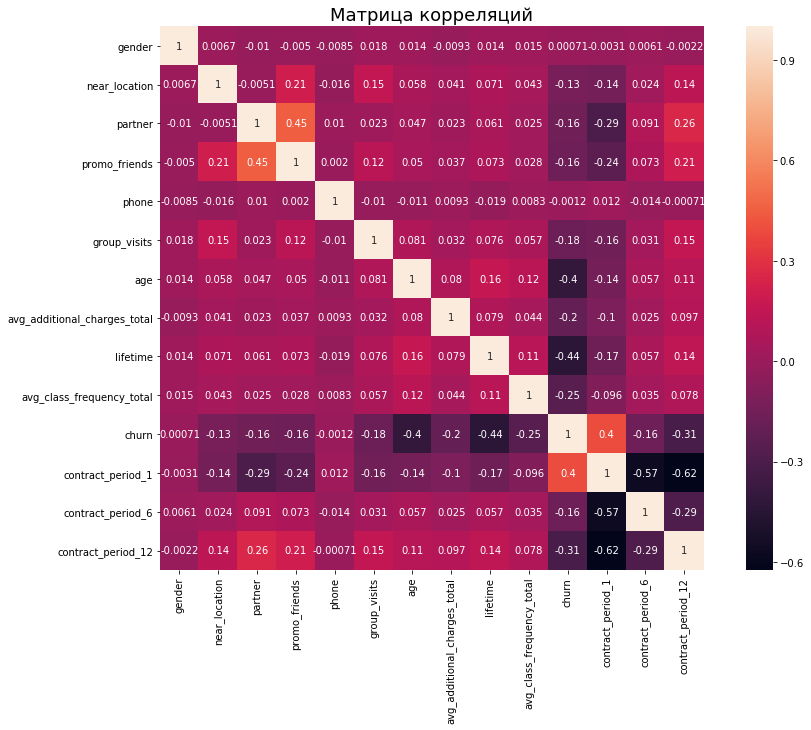

In [23]:
mc = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(data=mc, annot=True, square=True)
plt.title('Матрица корреляций', fontsize=18)
plt.show()

### Вывод

Полученные данные о клиентах фитнес-центра расположились в 14 столбцах и 4000 строк, пропущенные значения отсутсвуют. Проверка на наличие дубликатов показала отсутствие таковых. Мы провели работу по предобработке данных, а именно:
- преобразовали типы данных на более подходящие, что позволило сократить объем используемой памяти;
- преобразовали наименование столбцов в змеиный регистр;
- провели преобразование категориального признака contract_period.  

Изучили данные с помощью метода describe() и выявили, что:
- разделение клиентов по гендерному признаку происходит практически равнозначно; 
- большинство клиентов проживают или работают рядом с фитнес-центром;
- почти 50% клиентов дают компании партнеры;
- примерно треть клиентов приобрели свой первый абонемент в рамках акции «приведи друга»;
- датасет хранит контактные номера подавляющего большинства клиентов;
- на групповые занятия ходит порядка 41% пользователей;
- среднее и медианное значение возрастра клиентов совпадают и равняются 29 годам, минимальный возраст зарегистрированного клиента - 18 лет, а максимальный - 41 год;
- максимальная продожительность пользования клиентом услугами фитнес-центра зафиксирована сроком 31 месяц, тогда как средний показатель не достигает и 4 месяцев;
- почти 55% посетителей приобретают абонемент на 1 месяц, около 21% посетителей предпочитают абонементы сроком на пол года и 24% - на год;
- в среднем посетители посещают зал не более 2 раз в неделю, это подтверждает и медианное значение;
- среднее значение признака avg_class_frequency_current_month, говорит о том, что средние значение посещений зала в неделю идет на спад, это может связано с сезоностью, а также ухудшением предоставляемых услуг;
- среднее значение суммарной выручки ниже медианного значения, а стандартное отклонение достаточно высокое, это говорит о том, что большая часть посетителей тратят мало средств на доп. услуги центра.  

Затем сгруппировали данные по признаку оттока клиентов churn и изучив средние показатели тех кто ушел и тех кто остался, сделали следующие выводы:
- гендерные признаки никак не влияют на статистику оттока клиентов;
- среди ушедших посетителей меньшее количество проживающих или работающих рядом людей, чем среди активных;
- фитнес-центр чаще теряет клиентов не связанных с компаниями-партнерами и не пришедших по промо-акции "приведи друга";
- клиенты не пользующиеся групповыми занятиями, чаще перестают пользоваться услугами клуба;
- средний возрат группы ушедших клиентов ниже, чем у действующих;
- посетители не планирующие долго задерживаться в клубе, чаще покупают абонементы сроком на 1 месяц;
- показатель суммарной выручки у группы оттока более низкий.

Построив гистограммы распределения значений признаков не выявили явных выбросов. А матрица корреляций показала, большинство признаков не имеют между собой сильной связи. Наиболее коррелирующие признаки, это:
- contract_period_12 и month_to_end_contract;
- contract_period_1 и month_to_end_contract.  

Целевая переменная `churn` сильнее всего коррелируют с признаками: age, month_to_end_contract, lifetime, avg_class_frequency_current_month, contract_period_1 и contract_period_12.

## Машинное обучение. Прогнозирование и кластеризация

### Модели прогнозирования оттока клиентов

Для построения и обучения будущих моделей, разделим датасет на признаки и целевую переменную.

In [24]:
# X - признаки
X = data.drop('churn', axis=1)

# Y - целевая переменная
y= data['churn']

Теперь необходимо разделить полученные переменные на обучающие и валидационные выборки.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Так как алгоритмы машинного обучения лучше работают на стандартизированных данных, применим объект класса StandardScaler к нашим выборкам.

In [26]:
scaler = StandardScaler()

Стандартизируем обучающую выборку.

In [27]:
X_train_st = scaler.fit_transform(X_train)

И тестовую.

In [28]:
X_test_st = scaler.transform(X_test)

Для прогнозирования оттока клиентов, подойдут модели бинарной классификации. Возьмем две их них LogisticRegression и RandomForestClassifier.

In [29]:
lr_model = LogisticRegression(solver='liblinear')

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

И обучим эти модели на train выборке.

In [30]:
lr_model.fit(X_train_st, y_train)

rf_model.fit(X_train_st, y_train);

Воспользуйемся уже обученной моделью, чтобы сделать прогнозы по тестовой выборке.

In [31]:
#LogisticRegression
predictions_lr = lr_model.predict(X_test_st)
probabilities_lr = lr_model.predict_proba(X_test_st)[:,1]

In [32]:
#RandomForestClassifier
predictions_rf = rf_model.predict(X_test_st)
probabilities_rf = rf_model.predict_proba(X_test_st)[:,1]

Для сравнения моделей и выбора лучшей, напишем функцию, которая будет выводить их метрики.

In [33]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\nДоля правильных ответов (Accuracy): {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('Точность (Precision): {:.2f}'.format(precision_score(y_true, y_pred)))
    print('Полнота (Recall): {:.2f}'.format(recall_score(y_true, y_pred)))

Теперь изучим метрики моделей.

In [34]:
#LogisticRegression
print_all_metrics(y_test, predictions_lr, probabilities_lr, 'Метрики модели логистической регрессии')

Метрики модели логистической регрессии

Доля правильных ответов (Accuracy): 0.90
Точность (Precision): 0.79
Полнота (Recall): 0.81


In [35]:
#RandomForestClassifier
print_all_metrics(y_test, predictions_rf, probabilities_rf, 'Метрики модели случайного леса')

Метрики модели случайного леса

Доля правильных ответов (Accuracy): 0.89
Точность (Precision): 0.79
Полнота (Recall): 0.77


Обе модели имеют схожие показатели, но логистическая регрессия все же немного превосходит метрики модели случайного леса, поэтому остановим свой выбор на ней. 

### Кластеризация клиентов

Прежде чем преступать к кластеризации клиентов клуба, стандартизируем признаки переменной Х не разбивая ее на обучающую и валидационную выборки.

In [36]:
X_sc = scaler.fit_transform(X)

Сохраним в переменную `linked` матрицу расстояний между признаками.

In [37]:
linked = linkage(X_sc, method = 'ward') 

И визуализируем ее.

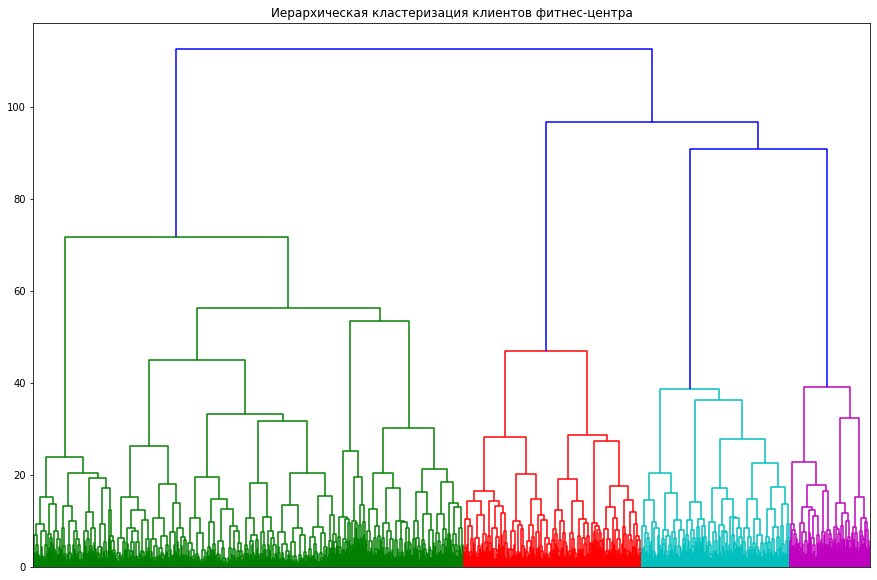

In [38]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов фитнес-центра')
plt.xticks([])
plt.show() 

График разбил клиентов на 5 кластеров, выделим их в алгоритме обучения K-Means.    

Создадим модель и обучим ее.

In [39]:
km_model = KMeans(n_clusters=5, random_state=0)

km_model.fit(X_sc);

Спрогнозируем кластеры для клиентов клуба.

In [40]:
labels = km_model.predict(X_sc)

Добавим колонку с номером кластера в таблицу data.

In [41]:
data['cluster_km'] = labels

Сгруппируем данные по кластерам и посмотрим на средние значения признаков для каждый группы.

In [42]:
data.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,contract_period_1,contract_period_6,contract_period_12
cluster_km,,,,,,,,,,,,,,
0,0.509934,0.000000,0.419426,0.068433,0.909492,0.192053,28.392936,132.417836,2.604857,1.697212,0.501104,0.969095,0,0.030905
1,0.510571,0.946089,0.721987,0.484144,0.902748,0.550740,29.852008,163.674598,4.690275,2.023906,0.022199,0.000000,0,1.000000
2,0.516206,0.861945,0.575030,0.374550,0.895558,0.441777,29.548619,151.647734,4.138055,1.945273,0.124850,0.000000,1,0.000000
3,0.523445,1.000000,0.000000,0.000000,0.905263,0.375120,28.866986,138.790205,3.111962,1.808549,0.426794,1.000000,0,0.000000
4,0.484094,1.000000,0.822960,0.598893,0.907331,0.388658,28.845090,140.518859,3.572614,1.828880,0.363762,1.000000,0,0.000000


И посмотрим на распределение значений признаков каждой группы.

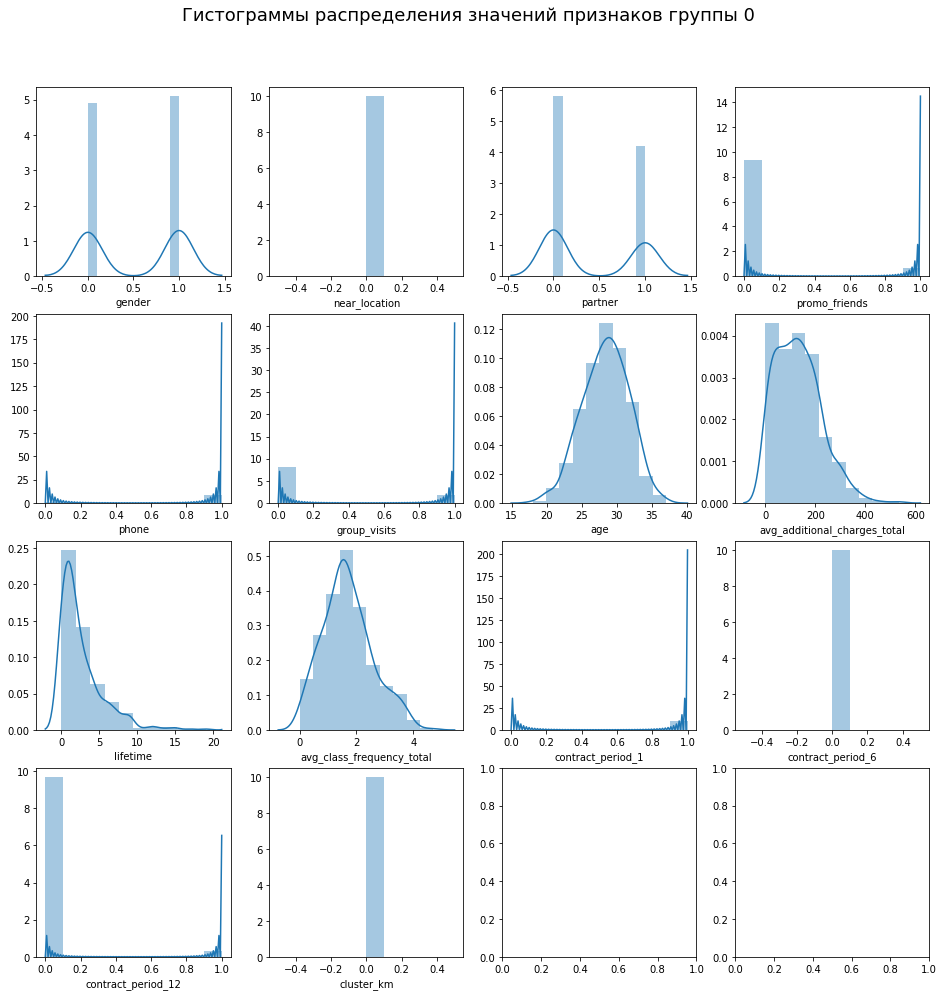

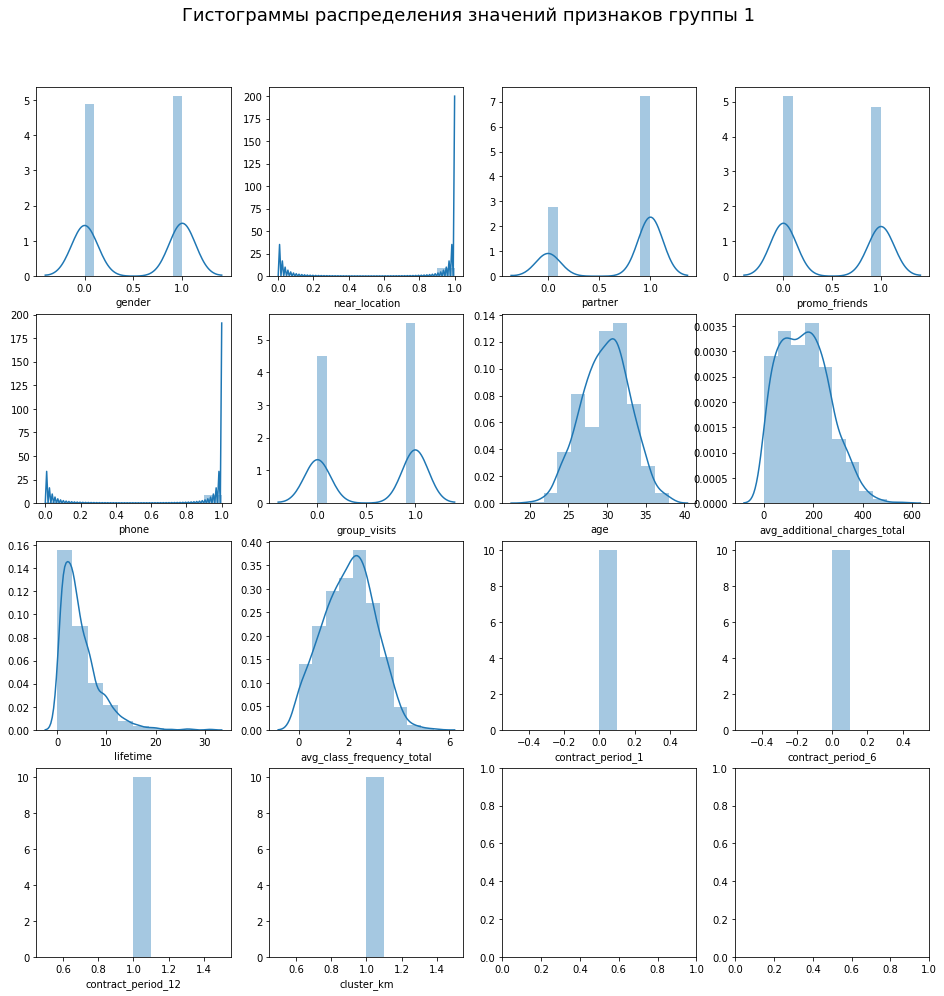

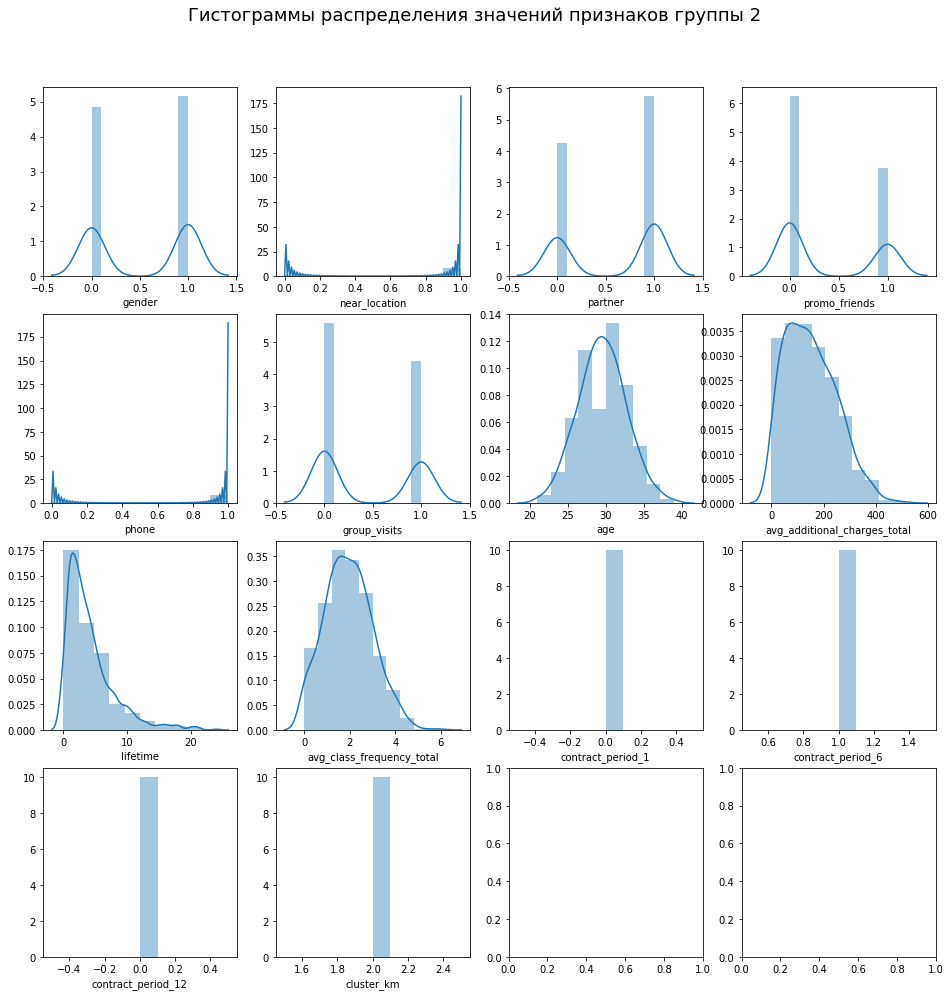

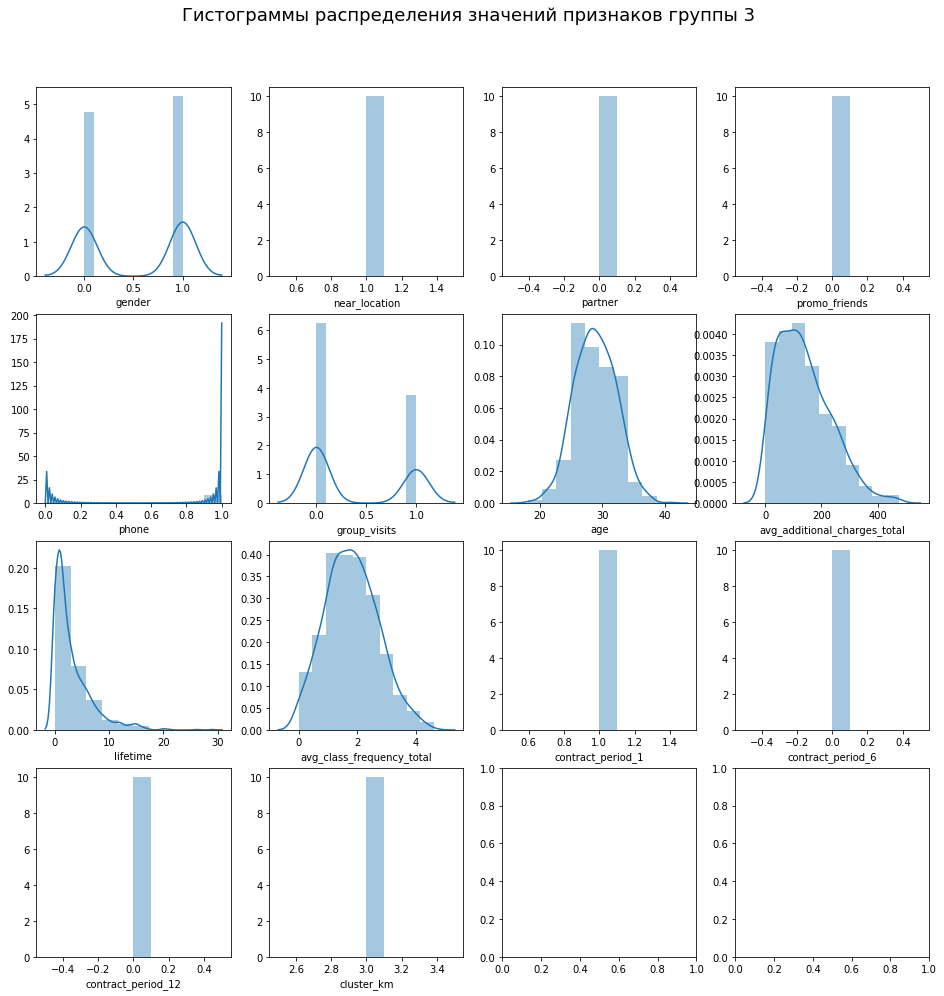

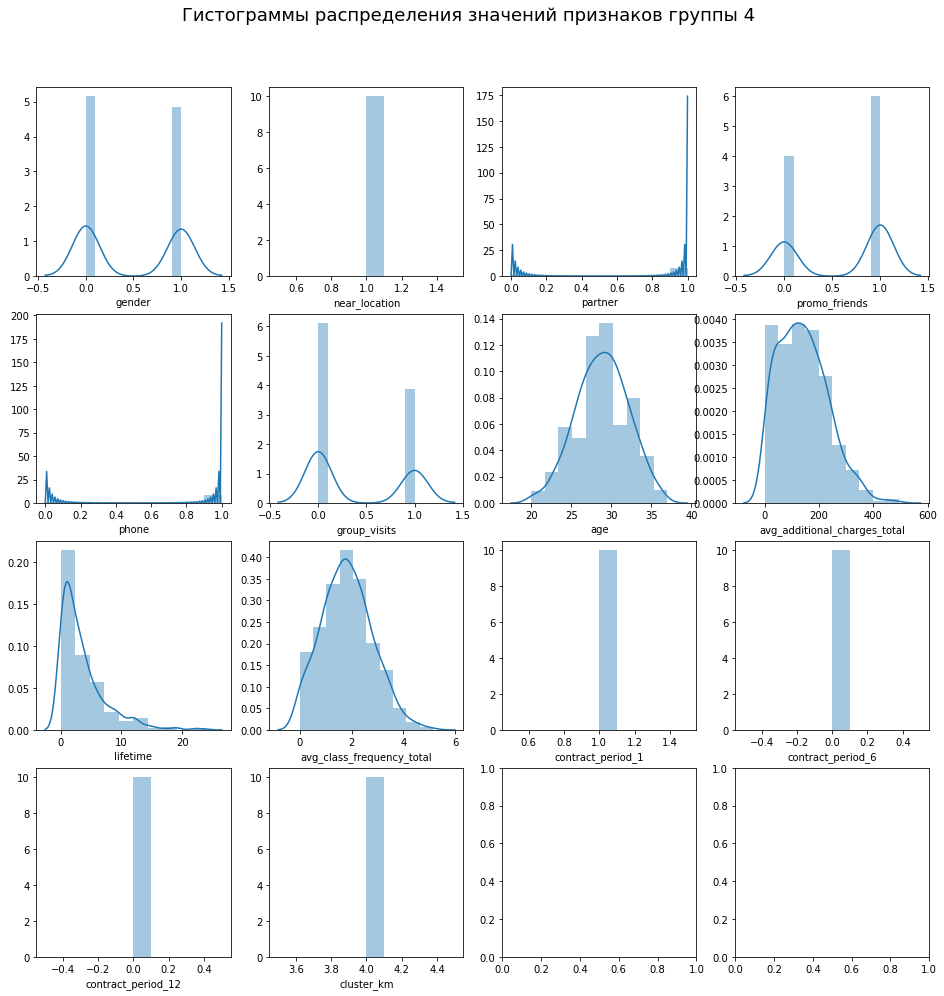

In [43]:
for i in range(5):
    fig, ax = plt.subplots(4, 4, figsize=(16,16))
    ax = ax.ravel()
    plt.suptitle(f'Гистограммы распределения значений признаков группы {i}', fontsize=18, y=0.95)

    for n, feature in enumerate(data.drop('churn', axis=1).columns):
        sns.distplot(data[data['cluster_km'] == i][feature], bins=10, ax=ax[n])
    plt.show()

Разбив клиентов на 5 групп, мы получили доли оттока клиентов каждой. Группа 0 - 50% оттока, группа 1 - 22% оттока, группа 2 - 12,5% оттока, группа 3 - почти 42,7% и в 4 группе 36,4 % оттока. Таким образом группы с номерами 0, 3 и 4 наиболее подвержены к оттоку.  

Основные различия групп:
- клиенты имеющие плохое удержание приобретают только абонементы со сроком на 1 месяц;
- средние значения "времени жизни" клиента по группам 0, 3 и 4 составляет не более 4 месяцев, тогда как у положительных групп этот показатель более 4 месяцев;
- средний возраст групп 0 и 4 ниже, чем у "позитивных", таким образом молодые люди более подвержены оттоку;
- также заметно, что клиенты когорт подверженных наибольшему оттоку реже посещают групповые занятия, чем остальные.

Рекомендации:
- Сменить абонемент сроком на 1 месяц, абонементом на 3 месяца или вовсе отказаться от краткосрочных абонементов и оставить 6-ти и 12-ти месячные абонементы;
- Разнообразить групповые занятия для увеличения вовлеченности клиентов, возможно стоит обратить внимание на график проводимых занятий, не всем клиентам удобно текущее расписание;
- Проводить спортивные мероприятия направленные на общение и знакомство клиентов клуба;
- Добавить детские занятия, чтобы родители могли приходить со своими детьми и заниматься фитнесом, пока дети занимаются по своим программам.

### Вывод

Для прогнозирования оттока клиентов сети фитнес-центров мы подготовили две можеди машинного обучения на базе алгоритмов логистической регрессии и случайного леса. Обучили данные модели на train выборке и провели работу на валидационной. 
Получили следующие метрики моделей:
- Модель логистической регрессии

    Доля правильных ответов (Accuracy): 0.90
    Точность (Precision): 0.79
    Полнота (Recall): 0.81  
    
    
- Модель случайного леса

    Доля правильных ответов (Accuracy): 0.89
    Точность (Precision): 0.79
    Полнота (Recall): 0.77  
    
Обе модели имеют схожие показатели, но логистическая регрессия все же немного превосходит метрики модели случайного леса, поэтому модель логистической регрессии будет предоставлена заказчику.   
Для выявления портрета клиента предрасположенному к быстрому оттоку, мы применили кластеризацию на основе алгоритма KMeans. Сперва построили матрицу расстояний и визуализировали ее с помощью дендограммы для определения количества групп. Разбив клиентов на 5 групп, мы получили доли оттока клиентов каждой. Группа 0 - 50% оттока, группа 1 - 22% оттока, группа 2 - 12,5% оттока, группа 3 - почти 42,7% и в 4 группе 36,4 % оттока. Таким образом группы с номерами 0, 3 и 4 наиболее подвержены к оттоку.  

Основные различия групп:
- клиенты имеющие плохое удержание приобретают только абонементы со сроком на 1 месяц;
- средние значения "времени жизни" клиента по группам 0, 3 и 4 составляет не более 4 месяцев, тогда как у положительных групп этот показатель более 4 месяцев;
- средний возраст групп 0 и 4 ниже, чем у "позитивных", таким образом молодые люди более подвержены оттоку;
- также заметно, что клиенты когорт подверженных наибольшему оттоку реже посещают групповые занятия, чем остальные.

Рекомендации:
- Сменить абонемент сроком на 1 месяц, абонементом на 3 месяца или вовсе отказаться от краткосрочных абонементов и оставить 6-ти и 12-ти месячные абонементы;
- Разнообразить групповые занятия для увеличения вовлеченности клиентов, возможно стоит обратить внимание на график проводимых занятий, не всем клиентам удобно текущее расписание;
- Проводить спортивные мероприятия направленные на общение и знакомство клиентов клуба;
- Добавить детские занятия, чтобы родители могли приходить со своими детьми и заниматься фитнесом, пока дети занимаются по своим программам.

## Общий вывод

Наша задача состояла в проведении анализа и подготовке плана действий по удержанию клиентов сети фитнес-центров.
Полученные данные о клиентах фитнес-центра расположились в 14 столбцах и 4000 строк, пропущенные значения отсутсвуют. Проверка на наличие дубликатов показала отсутствие таковых. Мы провели работу по предобработке данных, а именно:
- преобразовали типы данных на более подходящие, что позволило сократить объем используемой памяти;
- преобразовали наименование столбцов в змеиный регистр;
- провели преобразование категориального признака contract_period.  

Изучили данные с помощью метода describe() и выявили, что:
- разделение клиентов по гендерному признаку происходит практически равнозначно; 
- большинство клиентов проживают или работают рядом с фитнес-центром;
- почти 50% клиентов дают компании партнеры;
- примерно треть клиентов приобрели свой первый абонемент в рамках акции «приведи друга»;
- датасет хранит контактные номера подавляющего большинства клиентов;
- на групповые занятия ходит порядка 41% пользователей;
- среднее и медианное значение возрастра клиентов совпадают и равняются 29 годам, минимальный возраст зарегистрированного клиента - 18 лет, а максимальный - 41 год;
- максимальная продожительность пользования клиентом услугами фитнес-центра зафиксирована сроком 31 месяц, тогда как средний показатель не достигает и 4 месяцев;
- почти 55% посетителей приобретают абонемент на 1 месяц, около 21% посетителей предпочитают абонементы сроком на пол года и 24% - на год;
- в среднем посетители посещают зал не более 2 раз в неделю, это подтверждает и медианное значение;
- среднее значение признака avg_class_frequency_current_month, говорит о том, что средние значение посещений зала в неделю идет на спад, это может связано с сезоностью, а также ухудшением предоставляемых услуг;
- среднее значение суммарной выручки ниже медианного значения, а стандартное отклонение достаточно высокое, это говорит о том, что большая часть посетителей тратят мало средств на доп. услуги центра.  

Затем сгруппировали данные по признаку оттока клиентов churn и изучив средние показатели тех кто ушел и тех кто остался, сделали следующие выводы:
- гендерные признаки никак не влияют на статистику оттока клиентов;
- среди ушедших посетителей меньшее количество проживающих или работающих рядом людей, чем среди активных;
- фитнес-центр чаще теряет клиентов не связанных с компаниями-партнерами и не пришедших по промо-акции "приведи друга";
- клиенты не пользующиеся групповыми занятиями, чаще перестают пользоваться услугами клуба;
- средний возрат группы ушедших клиентов ниже, чем у действующих;
- посетители не планирующие долго задерживаться в клубе, чаще покупают абонементы сроком на 1 месяц;
- показатель суммарной выручки у группы оттока более низкий.

Построив гистограммы распределения значений признаков не выявили явных выбросов. А матрица корреляций показала, большинство признаков не имеют между собой сильной связи. Наиболее коррелирующие признаки, это:
- contract_period_12 и month_to_end_contract;
- contract_period_1 и month_to_end_contract.  

Целевая переменная `churn` сильнее всего коррелируют с признаками: age, month_to_end_contract, lifetime, avg_class_frequency_current_month, contract_period_1 и contract_period_12.  

Для прогнозирования оттока клиентов сети фитнес-центров мы подготовили две можеди машинного обучения на базе алгоритмов логистической регрессии и случайного леса. Обучили данные модели на train выборке и провели работу на валидационной. 
Получили следующие метрики моделей:
- Модель логистической регрессии

    Доля правильных ответов (Accuracy): 0.90
    Точность (Precision): 0.79
    Полнота (Recall): 0.81  
    
    
- Модель случайного леса

    Доля правильных ответов (Accuracy): 0.89
    Точность (Precision): 0.79
    Полнота (Recall): 0.77  
    
Обе модели имеют схожие показатели, но логистическая регрессия все же немного превосходит метрики модели случайного леса, поэтому модель логистической регрессии будет предоставлена заказчику.   
Для выявления портрета клиента предрасположенному к быстрому оттоку, мы применили кластеризацию на основе алгоритма KMeans. Сперва построили матрицу расстояний и визуализировали ее с помощью дендограммы для определения количества групп. Разбив клиентов на 5 групп, мы получили доли оттока клиентов каждой. Группа 0 - 50% оттока, группа 1 - 22% оттока, группа 2 - 12,5% оттока, группа 3 - почти 42,7% и в 4 группе 36,4 % оттока. Таким образом группы с номерами 0, 3 и 4 наиболее подвержены к оттоку.  

Основные различия групп:
- клиенты имеющие плохое удержание приобретают только абонементы со сроком на 1 месяц;
- средние значения "времени жизни" клиента по группам 0, 3 и 4 составляет не более 4 месяцев, тогда как у положительных групп этот показатель более 4 месяцев;
- средний возраст групп 0 и 4 ниже, чем у "позитивных", таким образом молодые люди более подвержены оттоку;
- также заметно, что клиенты когорт подверженных наибольшему оттоку реже посещают групповые занятия, чем остальные.

Рекомендации:
- Сменить абонемент сроком на 1 месяц, абонементом на 3 месяца или вовсе отказаться от краткосрочных абонементов и оставить 6-ти и 12-ти месячные абонементы;
- Разнообразить групповые занятия для увеличения вовлеченности клиентов, возможно, стоит обратить внимание на график проводимых занятий, не всем клиентам удобно текущее расписание;
- Проводить спортивные мероприятия направленные на общение и знакомство клиентов клуба;
- Добавить детские занятия, чтобы родители могли приходить со своими детьми и заниматься фитнесом, пока дети занимаются по своим программам.